In [37]:
import pandas as pd
import numpy as np
from simulations.simulator import Basefee, Simulator, Demand
from simulations.oracle import Oracle
import matplotlib.pyplot as plt

# save into hdf5 file
import os
import h5py
import uuid

output_dir = os.getcwd() + "/generated_data/hdf5_files/"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

image_dir = os.getcwd() + "/generated_data/figures/"

In [38]:
# Basic testing code to see if simulator is working

basefee = Basefee(10000,15000,30000)
b = basefee.scaled_copy(0.5)
resource_in = ["call_data","evm"]
ratio = [0.5,0.5]


sim = Simulator(basefee,resource_in,ratio)
demand = Demand(1000,100,51,1000)
sim.simulate(demand)

({'call_data': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  'evm': [0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0,
   0.0,
   -0.0]},
 {'blocks': [[{'call_data price': 0.0,
     'call_data limit': 15000.0,
     'evm price': 0.0,
     'evm limit': 3941.0

In [57]:
for i in range(8):
    # Randomized knapsack solver
    bf_standard_value = 38.100002694
    bf_standard = Basefee(1.0 / 8, 15000000, 30000000, bf_standard_value)  # d, target gas, max gas
    # note our gas maxima are "real-life" amounts, but our actual gas per transaction is about 10x
    # bigger, for sake of simplicity

    demand = Demand(2000, 300, 400, bf_standard_value)

    mbf_sim = Simulator(bf_standard, ("gas", "space"), (0.7, 0.3), resource_behavior="CORRELATED",knapsack_solver="greedy")
    basefees_data, block_data, mempools_data = mbf_sim.simulate(demand)

    plt.rcParams["figure.figsize"] = (15, 10)
    plt.title("Basefee over Time")
    plt.xlabel("Block Number")
    plt.ylabel("Basefee (in Gwei)")
    plt.plot(basefees_data["gas"], label="gas")
    basefees_data_space = [x + 1 for x in basefees_data["space"]]
    plt.plot(basefees_data_space, label="space")
    plt.legend(loc="upper left")
    # plt.show()

    # Save hdf5 file
    uniqueid = str(uuid.uuid1()).rsplit("-")[0]
    filename = "meip_data-dimensions-{0:d}-{x}-block_method-{y}-{uuid}".format(mbf_sim.dimension,x=mbf_sim.resource_behavior,y=mbf_sim.knapsack_solver,uuid=uniqueid)

    plt.savefig(image_dir+filename+".png")
    plt.cla()

    f = h5py.File(output_dir+filename+".hdf5","w")
    f.create_dataset("gas",data=basefees_data["gas"],compression="gzip")
    f.create_dataset("space",data=basefees_data_space,compression="gzip")
    f.close()

KeyError: '[0 1 2 3 4 5 6 7 8 9 10 12 13 14 15 16 18 19 20 21 22 23 24 25 26 27 28 29\n 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54\n 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78\n 79 80 81 82 83 84 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102\n 103 104 106 107 108 109 111 112 113 114 115 116 117 118 119 120 121 122\n 123 124 125 126 127 128 129 130 131 133 134 135 136 137 138 139 140 141\n 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159\n 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 176 177 178\n 179 180 181 182 183 184 185 186 187 189 190 191 192 193 194 195 196 197\n 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215\n 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233\n 234 235 236 237 238 239 240 241 242 243 244 245 247 248 249 250 251 252\n 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270\n 271 272 273 274 275 276 277] not found in axis'

401
401
8


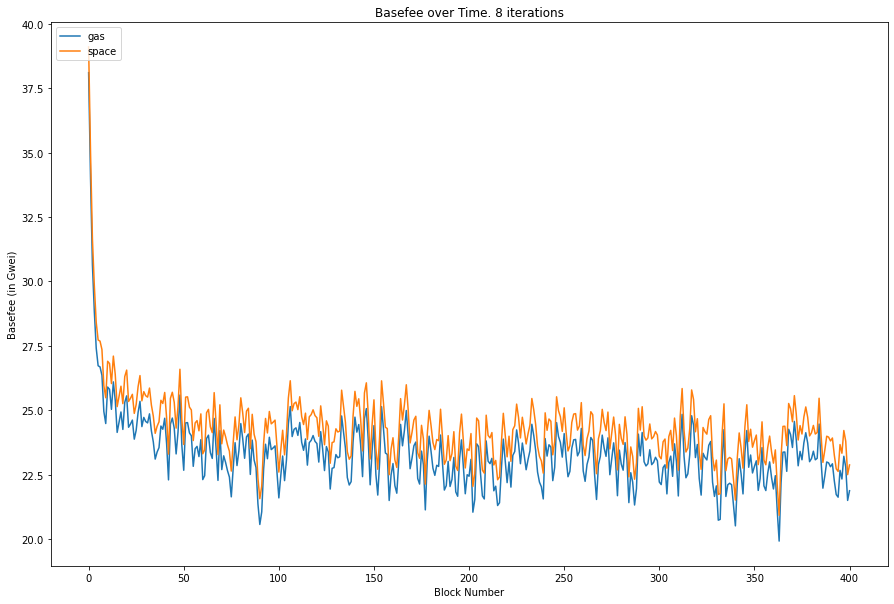

In [42]:
# take average hdf5 and plot
output_dir = os.getcwd() + "/generated_data/hdf5_files/"

resource_behavior = "CORRELATED"
knapsack_solver = "random"

gas_average = [0 for x in range(401)]
space_average = [0 for x in range(401)]
num_files = 0

for filename in os.listdir(output_dir):
    if "meip_data" not in filename or resource_behavior not in filename or knapsack_solver not in filename:
        continue
    if "averaged" in filename:
        continue
    f = h5py.File(output_dir+filename,"r")
    gas_average = np.add(gas_average,list(f["gas"]))
    space_average = np.add(space_average,list(f["space"]))
    num_files+=1

# gas_average /= num_files
# space_average /= num_files

gas_average = [x / num_files for x in gas_average]
space_average = [x / num_files for x in space_average]

print(len(gas_average))
print(len(space_average))
print(num_files)

# Save data as hdf5
filename = "meip_data-dimensions-{0:d}-{x}-block_method-{y}-averaged".format(2,x=resource_behavior,y=knapsack_solver)
f = h5py.File(output_dir+filename+".hdf5","w")
f.create_dataset("gas",data=gas_average,compression="gzip")
f.create_dataset("space",data=space_average,compression="gzip")
f.close()

# Save data as csv
df = pd.DataFrame({"gas":gas_average,"space":space_average})
df.to_csv(output_dir+filename+".csv",index=False)

plt.rcParams["figure.figsize"] = (15, 10)
plt.title("Basefee over Time. {0:d} iterations".format(num_files))
plt.xlabel("Block Number")
plt.ylabel("Basefee (in Gwei)")
plt.plot(gas_average, label="gas")
plt.plot(space_average, label="space")
plt.legend(loc="upper left")
plt.savefig(image_dir+filename+".png")
plt.show()

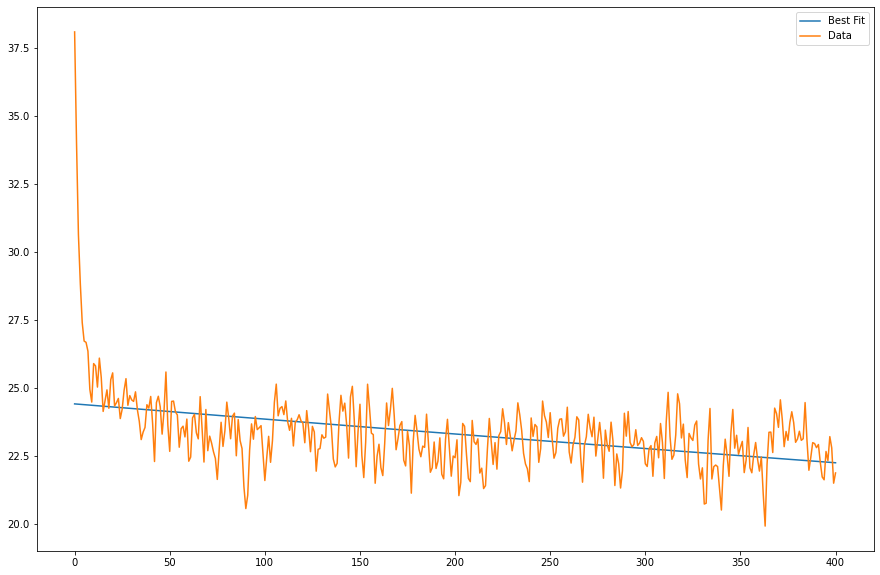

In [55]:
# Model fitting
from lmfit import Model, Parameters, minimize, report_fit
def Exponential(x, A, sigma, c=None):
    if c == None:
        c = 0
    return A * np.exp(-(x / sigma)) + c

x_array = [x for x in range(len(gas_average))]

gmodel = Model(Exponential)
params = Parameters()
params.add('A', value=40, vary=True)
params.add('alpha', value=2, vary=True)
params.add('sigma', value=100, vary=True)
gresult = gmodel.fit(gas_average, params, x=x_array)

# Plot
plt.plot(x_array, gresult.best_fit, '-', label="Best Fit")
plt.plot(x_array, gas_average, label="Data")
plt.legend()
plt.show()

print(gresult.result)